In [1]:
import os 
json_path = 'server/data/'
image_path = 'server/static/images/'

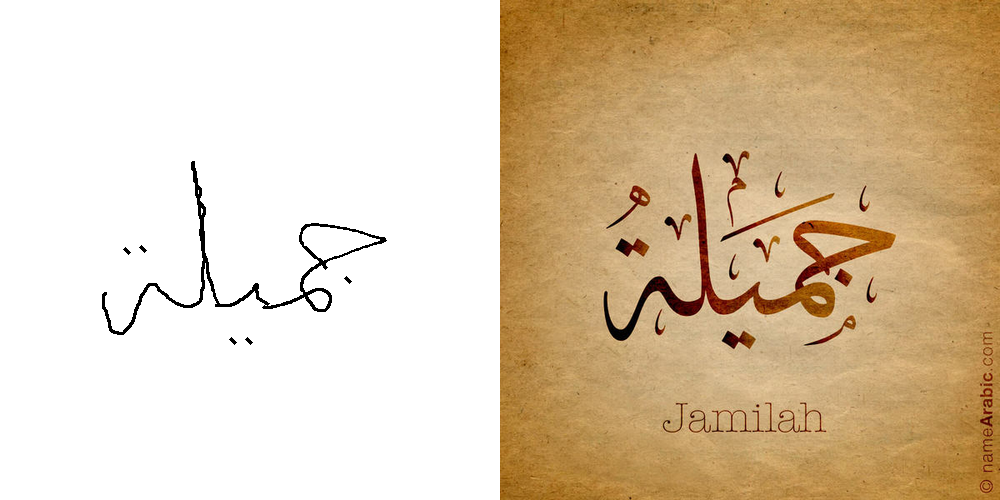

In [2]:
from PIL import Image, ImageDraw
import json
import numpy as np

def img_from_stroke(json_file):
    drawing = json.load(open(json_path+json_file))
    img_A = Image.new('RGB', (500, 500), (255, 255, 255)) 
    draw = ImageDraw.Draw(img_A) 
    for item in drawing:
        char = list(item.keys())[0]
        stroke = item[char]
        if len(stroke) == 1:
            x, y = stroke[0]
            stroke.append([x+5, y+5])
        for i, point in enumerate(stroke):
            if i == 0:
                x_prev, y_prev = point
                continue
            x, y = point 
            draw.line([x_prev, y_prev, x, y], fill=(0, 0, 0), width = 3)
            x_prev, y_prev = x, y
    return img_A

json_file = np.random.choice(os.listdir(json_path))
A = img_from_stroke(json_file)
B = Image.open(image_path+json_file[:-4]+'jpg') 
B = B.resize((500,500), Image.ANTIALIAS)
C = Image.new('RGB', (1000, 500))
C.paste(A, (0,0))
C.paste(B, (500,0))
C

In [9]:
def create_dataset():
    os.makedirs('pix2pix', exist_ok = True )
    os.makedirs('pix2pix/train', exist_ok = True)
    os.makedirs('pix2pix/val', exist_ok = True)
    os.makedirs('pix2pix/test', exist_ok = True)
    
    for i, json_file in enumerate(os.listdir(json_path)):
        A = img_from_stroke(json_file)
        img_name = json_file[:-5]
        B = Image.open(image_path+img_name+'.jpg') 
        B = B.resize((500,500), Image.ANTIALIAS)
        C = Image.new('RGB', (1000, 500))   
        C.paste(A, (0,0))
        C.paste(B, (500,0))
        if i < 400:
            split = 'train'
        elif i <500:
            split = 'val'
        else:
            split = 'test'
        C.save(f'pix2pix/{split}/{img_name}.jpg')

In [10]:
create_dataset()

In [11]:
!zip -r dataset.zip pix2pix

  adding: pix2pix/ (stored 0%)
  adding: pix2pix/test/ (stored 0%)
  adding: pix2pix/test/Amira_أميرة.jpg (deflated 7%)
  adding: pix2pix/test/Dalia_داليا.jpg (deflated 7%)
  adding: pix2pix/test/Amela_أميلا.jpg (deflated 7%)
  adding: pix2pix/test/Jehan_جيهان.jpg (deflated 7%)
  adding: pix2pix/test/Stephanie_ستيفاني.jpg (deflated 7%)
  adding: pix2pix/test/Elaph_إيلاف.jpg (deflated 7%)
  adding: pix2pix/test/Zaina_زينة.jpg (deflated 8%)
  adding: pix2pix/test/Aimee_إيمي.jpg (deflated 9%)
  adding: pix2pix/test/Nouf_نوف.jpg (deflated 8%)
  adding: pix2pix/test/Anees_أنيس.jpg (deflated 8%)
  adding: pix2pix/test/Bebhinn_بيفين.jpg (deflated 7%)
  adding: pix2pix/test/Fadwa_فدوى.jpg (deflated 7%)
  adding: pix2pix/test/Zakaria_زكريا.jpg (deflated 7%)
  adding: pix2pix/test/Alden_ألدن.jpg (deflated 7%)
  adding: pix2pix/test/Nisha_نيشا.jpg (deflated 8%)
  adding: pix2pix/test/Adnan_عدنان.jpg (deflated 7%)
  adding: pix2pix/test/Jessica_جيسيكا.jpg (deflated 7%)
  adding: pix2pix/test/Abdul

  adding: pix2pix/train/Musaab_مصعب.jpg (deflated 8%)
  adding: pix2pix/train/Engy_انجي.jpg (deflated 8%)
  adding: pix2pix/train/Shoug_شوق.jpg (deflated 7%)
  adding: pix2pix/train/Andar_أندر.jpg (deflated 8%)
  adding: pix2pix/train/Yasin_ياسين.jpg (deflated 8%)
  adding: pix2pix/train/Quratulain_قرة العين.jpg (deflated 6%)
  adding: pix2pix/train/Gordan_كردان.jpg (deflated 7%)
  adding: pix2pix/train/Gobi_غوبي.jpg (deflated 8%)
  adding: pix2pix/train/Akvail_أكفايل.jpg (deflated 7%)
  adding: pix2pix/train/Sumaira_سٌميرا.jpg (deflated 8%)
  adding: pix2pix/train/Qais_قيس.jpg (deflated 8%)
  adding: pix2pix/train/Naveed_نافيد.jpg (deflated 7%)
  adding: pix2pix/train/Arnold_آرنولد.jpg (deflated 7%)
  adding: pix2pix/train/Habeebullah_حبيب الله.jpg (deflated 7%)
  adding: pix2pix/train/Yaman_يمان.jpg (deflated 8%)
  adding: pix2pix/train/Raeef_رئيف.jpg (deflated 7%)
  adding: pix2pix/train/Logan_لوغان.jpg (deflated 7%)
  adding: pix2pix/train/Aqeel_عقيل.jpg (deflated 6%)
  adding: pix

  adding: pix2pix/train/Barclay_باركلي.jpg (deflated 7%)
  adding: pix2pix/train/Fatihah_فاتحة.jpg (deflated 7%)
  adding: pix2pix/train/Alina_آلينا.jpg (deflated 8%)
  adding: pix2pix/train/Leila_ليلى.jpg (deflated 8%)
  adding: pix2pix/train/Tuba_توبا.jpg (deflated 9%)
  adding: pix2pix/train/Abdulhaleem_عبد الحليم.jpg (deflated 7%)
  adding: pix2pix/train/Anan_عنان.jpg (deflated 8%)
  adding: pix2pix/train/Leny_لني.jpg (deflated 8%)
  adding: pix2pix/train/Amna_آمنة.jpg (deflated 7%)
  adding: pix2pix/train/Lubabah_لبابة.jpg (deflated 7%)
  adding: pix2pix/train/Treisis_تريسيس.jpg (deflated 7%)
  adding: pix2pix/train/Khuzama_خزامى.jpg (deflated 7%)
  adding: pix2pix/train/Niley_نيلي.jpg (deflated 8%)
  adding: pix2pix/train/Adli_عدلي.jpg (deflated 8%)
  adding: pix2pix/train/Fawaz_فواز.jpg (deflated 7%)
  adding: pix2pix/train/Walaa_الولاء.jpg (deflated 7%)
  adding: pix2pix/train/Ezzeldin_عز الدين.jpg (deflated 7%)
  adding: pix2pix/train/Nuruddin_نور الدين.jpg (deflated 6%)
  add

  adding: pix2pix/train/Raafi_رافع.jpg (deflated 7%)
  adding: pix2pix/train/Jead_جيد.jpg (deflated 7%)
  adding: pix2pix/train/Bedo_بيدو.jpg (deflated 9%)
  adding: pix2pix/train/Cardillo_كارديلو.jpg (deflated 7%)
  adding: pix2pix/train/Nataly_ناتالي.jpg (deflated 8%)
  adding: pix2pix/train/Bervian_بيريڤان.jpg (deflated 7%)
  adding: pix2pix/train/Amaleia_أمالية.jpg (deflated 7%)
  adding: pix2pix/train/Khaleda_خالدة.jpg (deflated 7%)
  adding: pix2pix/train/Florencia_فلورنسيا.jpg (deflated 15%)
  adding: pix2pix/train/Thaier_ثائر.jpg (deflated 8%)
  adding: pix2pix/train/Faee_فيء.jpg (deflated 9%)
  adding: pix2pix/train/Zahira_زاهرة.jpg (deflated 7%)
  adding: pix2pix/train/Chiara_كيارا.jpg (deflated 7%)
  adding: pix2pix/train/Hashim_هاشم.jpg (deflated 8%)
  adding: pix2pix/train/Rawiya_راوية.jpg (deflated 8%)
  adding: pix2pix/train/farzana_فرزانة.jpg (deflated 7%)
  adding: pix2pix/train/Hawa_حواء.jpg (deflated 8%)
  adding: pix2pix/train/Ghazal_غزل.jpg (deflated 16%)
  adding:

  adding: pix2pix/val/Alim_عالم.jpg (deflated 8%)
